In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from itertools import combinations

In [3]:
# import the Iris data set

iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [4]:
# set up some stuff for the plots

Xzeros0 = (0. * X) + .2
Xzeros1 = (0. * X) 
Xzeros2 = (0. * X) - .2

x_min, x_max = X.min() - 0.5, X.max() + 1.5

In [5]:
# get Iris classifications

IC = np.unique(Y)
IrisC = ('Setosa','Versicolor','Virginica')
pltC = ('red', 'blue', 'green')
pltCback = ('pink', 'lightblue','lightgreen')
pltM = ('o', 'x', '*')
for i in range(0,3):
    print (IC[i],pltM[i],IrisC[i],pltC[i],pltCback[i])
          

0 o Setosa red pink
1 x Versicolor blue lightblue
2 * Virginica green lightgreen


In [6]:
# setup Iris feature lablels

IrisF=("sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)")
for i in range(0,4):
    print(IrisF[i])

sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)


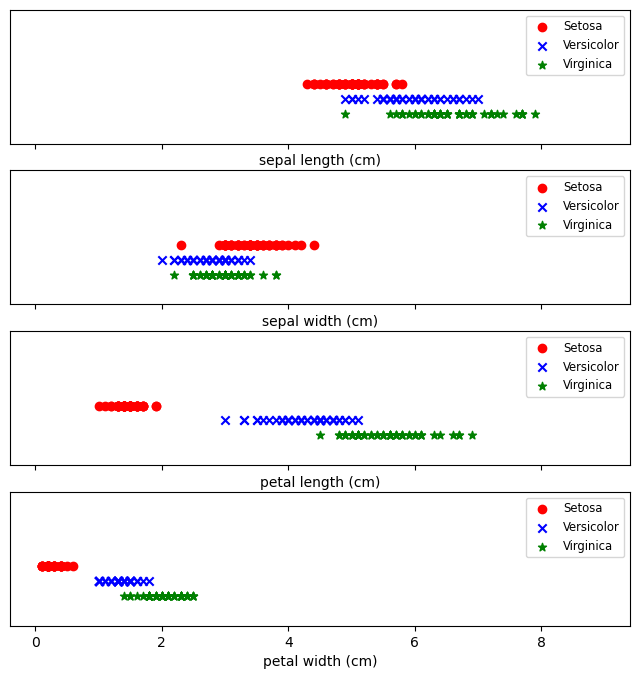

In [7]:
# plot data for all features 

plt.close('all')
fig, ax = plt.subplots(nrows=4, ncols=1, figsize= (8,8), sharex=True)

for i in range(4):
    x1F = IrisF[i]
    ax[i].scatter(X[Y == IC[0], i], Xzeros0[Y == IC[0],i],
                  color=pltC[0], marker=pltM[0], label=IrisC[0])
    ax[i].scatter(X[Y == IC[1], i], Xzeros1[Y == IC[1],i], 
                  color=pltC[1], marker=pltM[1], label=IrisC[1])
    ax[i].scatter(X[Y == IC[2], i], Xzeros2[Y == IC[2],i], 
                  color=pltC[2], marker=pltM[2], label=IrisC[2])
    ax[i].set_xlim(x_min,x_max)
    ax[i].set_ylim(-.6,+1.2)
    ax[i].set_xlabel(x1F)
    ax[i].axes.yaxis.set_visible(False)
    ax[i].legend(loc='upper right',fontsize='small')
      
plt.show()    

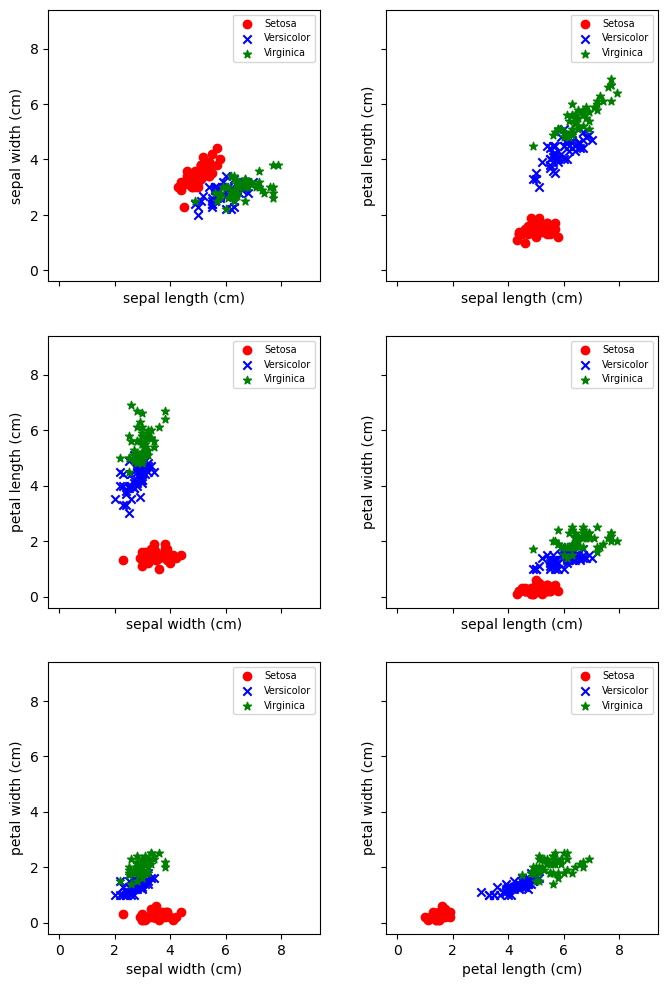

In [8]:
# plot data for all pairs of features 

plt.close('all')
fig, ax = plt.subplots(nrows=3, ncols=2, figsize= (8,12), sharex=True, sharey=True)

i = 0
k = 0
k1 = 0
k2 = 0
while i < 4:
    x2F = IrisF[i]
    j = 0
    while j < i:
        k1 = int(k/2)
        k2 = np.mod(k,2)
        x1F = IrisF[j]
        ax[k1,k2].scatter(X[Y == IC[0], j], X[Y == IC[0], i], 
                          color=pltC[0], marker=pltM[0], label=IrisC[0])
        ax[k1,k2].scatter(X[Y == IC[1], j], X[Y == IC[1], i], 
                          color=pltC[1], marker=pltM[1], label=IrisC[1])
        ax[k1,k2].scatter(X[Y == IC[2], j], X[Y == IC[2], i], 
                          color=pltC[2], marker=pltM[2], label=IrisC[2])
        ax[k1,k2].set(aspect='equal')
        ax[k1,k2].set_xlim(x_min,x_max)
        ax[k1,k2].set_ylim(x_min,x_max)
        ax[k1,k2].set_xlabel(x1F)
        ax[k1,k2].set_ylabel(x2F)
        ax[k1,k2].legend(loc='upper right', fontsize='x-small')
        j += 1
        k += 1
    i += 1
plt.show()    

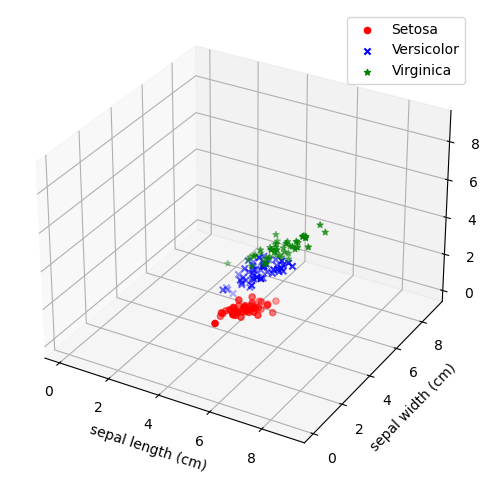

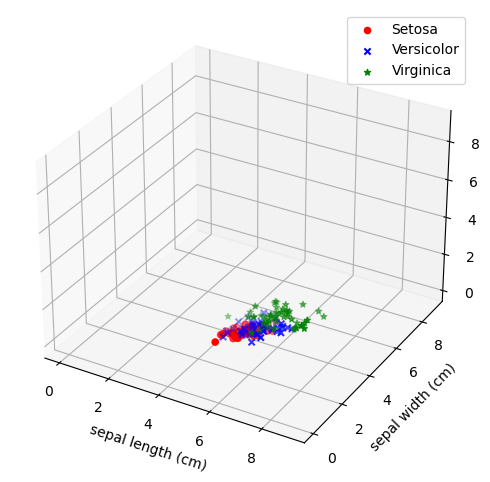

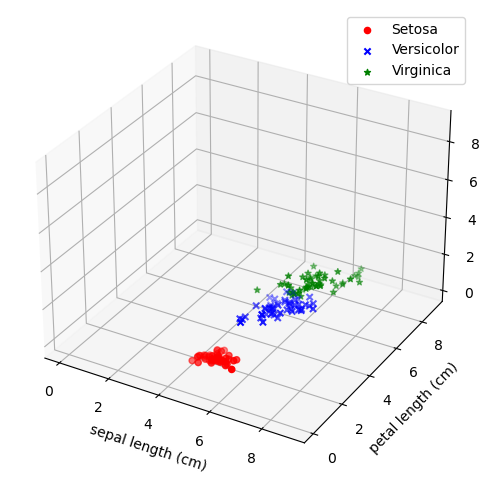

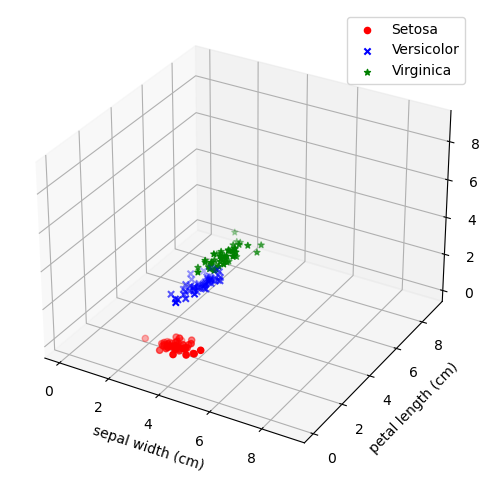

In [9]:
# plot data for all combinations of three features 

plt.close('all')

ix = [0,0,0,1]
iy = [1,1,2,2]
iz = [2,3,3,3]

for m in range(4):
    
    ixm = ix[m]
    iym = iy[m]
    izm = iz[m]
    xF = IrisF[ixm]
    yF = IrisF[iym]
    zF = IrisF[izm]

    fig = plt.figure(figsize=(6,6))    
    ax = plt.axes(projection='3d')   
    
    ax.scatter3D(X[Y == IC[0],ixm], X[Y == IC[0],iym], X[Y == IC[0],izm], 
        color=pltC[0], marker=pltM[0], label=IrisC[0])
    ax.scatter3D(X[Y == IC[1],ixm], X[Y == IC[1],iym], X[Y == IC[1],izm], 
        color=pltC[1], marker=pltM[1], label=IrisC[1])
    ax.scatter3D(X[Y == IC[2],ixm], X[Y == IC[2],iym], X[Y == IC[2],izm], 
        color=pltC[2], marker=pltM[2], label=IrisC[2])
    ax.set_xlim(x_min,x_max)
    ax.set_ylim(x_min,x_max)
    ax.set_zlim(x_min,x_max)
    ax.set_xlabel(xF)
    ax.set_ylabel(yF)
    ax.set_zlabel(zF)            
    ax.legend(loc='upper right', fontsize='medium')

plt.show()    

In [10]:
# choose the classes and features to be included in the model

cdx = np.array([0,1,2])             # this array contains the classes to be considered (can be 2-3 classes)
fdx = np.array([0,1,2,3])           # this array contains the features to be considered (can be 1-4 features)

nC = len(cdx)
nF = len(fdx)

print ('\nClasses')
for i in range(nC):
    print (cdx[i],IrisC[cdx[i]])
    
print ('\nFeatures')
for i in range(nF):
    print (fdx[i],IrisF[fdx[i]])


Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)
2 petal length (cm)
3 petal width (cm)


In [11]:
# build the XX and YY arrays
# these arrays contain the samples in the classes specified in cdx and include the features specified in fdx
# follow the original code and add some parameter to improve the model function 
def Model( selectedFeatures, lossFunction):
   
    nF = len(selectedFeatures)
    i = 0
    numY = 0
    for i in range(len(Y)):
        for j in range(nC):
            if Y[i] == IC[cdx[j]]:
                numY += 1

    YY = np.zeros((numY))
    XX = np.zeros((numY,nF))

    j = 0
    for i in range(len(Y)):
        for k in range(nC):
            if Y[i] == IC[cdx[k]]:        
                YY[j] = IC[cdx[k]]
                for m in range(nF):
                    XX[j,m] = X[i,selectedFeatures[m]] 
                j += 1
    return (SGDClassifier(tol=1e-4, random_state=0, loss=lossFunction), XX, YY)

In [12]:
#find  all type of features use Itertools Combinations() function
typeList = []
for featurenumber in range(1,5):  
        featuretypes = np.array(list(combinations(range(0,4), featurenumber)))
        print (featuretypes)
        for featuretype in featuretypes:
            typeList.append(featuretype)


[[0]
 [1]
 [2]
 [3]]
[[0 1]
 [0 2]
 [0 3]
 [1 2]
 [1 3]
 [2 3]]
[[0 1 2]
 [0 1 3]
 [0 2 3]
 [1 2 3]]
[[0 1 2 3]]


In [13]:
#fit the model and  determine the accuracy of the of the model using the Scikit Learn library and
#its SGD classifier using four different loss functions
def FitModel(lossFunc):
    score_List = []
    print(lossFunc)
    for featuretype in typeList:
        clf, XX, YY = Model( featuretype, lossFunc)
        clf.fit(XX,YY)
        score = clf.score(XX,YY)  
        score_List.append(score)
        print(featuretype, score)
    print( "\n")
    return (score_List);
        

In [14]:

hinge = FitModel("hinge")
perceptron = FitModel("perceptron")
log = FitModel("log_loss")
modified_huber =FitModel("modified_huber")


hinge
[0] 0.68
[1] 0.52
[2] 0.9466666666666667
[3] 0.96
[0 1] 0.7733333333333333
[0 2] 0.8733333333333333
[0 3] 0.94
[1 2] 0.8866666666666667
[1 3] 0.8933333333333333
[2 3] 0.96
[0 1 2] 0.8866666666666667
[0 1 3] 0.9266666666666666
[0 2 3] 0.7933333333333333
[1 2 3] 0.9133333333333333
[0 1 2 3] 0.9666666666666667


perceptron
[0] 0.5533333333333333
[1] 0.5333333333333333
[2] 0.8666666666666667
[3] 0.7666666666666667
[0 1] 0.7333333333333333
[0 2] 0.7666666666666667
[0 3] 0.7466666666666667
[1 2] 0.9133333333333333
[1 3] 0.68
[2 3] 0.8533333333333334
[0 1 2] 0.6666666666666666
[0 1 3] 0.9066666666666666
[0 2 3] 0.8
[1 2 3] 0.7666666666666667
[0 1 2 3] 0.9133333333333333


log_loss
[0] 0.6733333333333333
[1] 0.54
[2] 0.7066666666666667
[3] 0.9466666666666667
[0 1] 0.7666666666666667
[0 2] 0.6666666666666666
[0 3] 0.76
[1 2] 0.6866666666666666
[1 3] 0.8733333333333333
[2 3] 0.9266666666666666
[0 1 2] 0.9066666666666666
[0 1 3] 0.6066666666666667
[0 2 3] 0.9533333333333334
[1 2 3] 0.8
[0 1

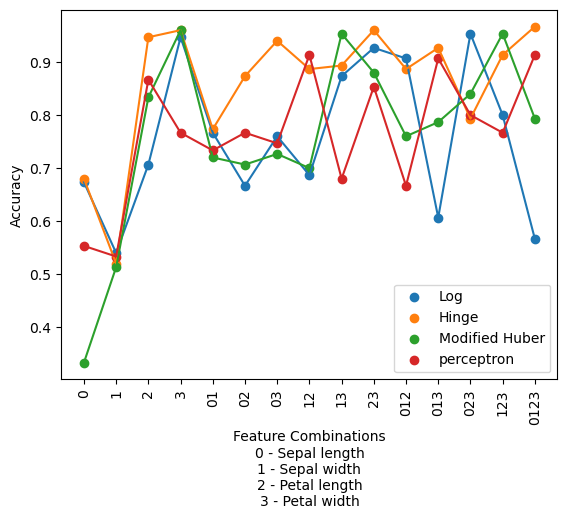

In [15]:
#use graph to demonstrate the combinations of features used and
#the loss function chosen affect the accuracy of the model.  
plt.xlabel("Feature Combinations\n0 - {0}\n1 - {1}\n2 - {2}\n3 - {3}".format('Sepal length', 'Sepal width', 'Petal length', 'Petal width'))
plt.ylabel("Accuracy")

def stringize(total, s):
    return  total + str(s)

def stringizeSuper(x):
    return ''.join([str(elem) for elem in x])

xlabels = list(map(lambda x: stringizeSuper(x), typeList))
indices = np.arange(15*4, step=4)

plt.scatter(indices, log, label="Log")
plt.scatter(indices, hinge, label="Hinge")
plt.scatter(indices, modified_huber, label="Modified Huber")
plt.scatter(indices, perceptron, label="perceptron")

plt.gca().set_xticks(indices)  # Set the tick locations
plt.gca().set_xticklabels(xlabels, rotation=90)  # Set the tick labels with rotation
plt.plot(indices, log)
plt.plot(indices, hinge)
plt.plot(indices, modified_huber)
plt.plot(indices, perceptron)
plt.legend()
plt.show()


discussion:

Based on the data analysis, hinge loss emerged as the most reliable and efficient choice for classification tasks involving the provided feature combinations. Log loss appears to be the most unstable, exhibiting significant fluctuations in accuracy.